## Cleaning and pre-processing data

In [1345]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn import preprocessing
import xgboost as xgb
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [1346]:
data = pd.read_csv('gsmmm.csv', encoding='latin-1')

c:\users\lusine\anaconda2\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (19,76,77,78,80,81,82,83,84,85,86) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [1347]:
data.head()

,oem,model,network_technology,network_2g_bands,network_gprs,network_edge,launch_announced,launch_status,body_dimensions,body_weight,...,features_alarm,features_languages,main_camera_triple,selfie_camera_v1,main_camera,main_camera_quad,selfie_camera_triple,main_camera_v1,main_camera_dual_or_triple,main_camera_five
0,Acer,Chromebook Tab 10,No cellular connectivity,NaN,No,No,"2018, March","Available. Released 2018, July",238.3 x 172.2 x 9.9 mm (9.38 x 6.78 x 0.39 in),544.3 g (1.20 lb),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acer,Iconia Talk S,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,Yes,Yes,"2016, August","Available. Released 2016, October",191.7 x 101 x 9.4 mm (7.55 x 3.98 x 0.37 in),260 g (9.17 oz),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Acer,Liquid Z6 Plus,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,Yes,Yes,"2016, August","Available. Released 2016, December",153.8 x 75.6 x 8.5 mm (6.06 x 2.98 x 0.33 in),169 g (5.96 oz),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Acer,Liquid Z6,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,Yes,Yes,"2016, August","Available. Released 2016, December",145.5 x 72.5 x 8.5 mm (5.73 x 2.85 x 0.33 in),126 g (4.44 oz),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Acer,Iconia Tab 10 A3-A40,No cellular connectivity,NaN,No,No,"2016, April","Available. Released 2016, June",259 x 167 x 8.9 mm (10.20 x 6.57 x 0.35 in),-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1348]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8980 entries, 0 to 8979
Data columns (total 87 columns):
oem                           8980 non-null object
model                         8980 non-null object
network_technology            8980 non-null object
network_2g_bands              8691 non-null object
network_gprs                  8959 non-null object
network_edge                  8959 non-null object
launch_announced              8980 non-null object
launch_status                 8980 non-null object
body_dimensions               8980 non-null object
body_weight                   8901 non-null object
body_sim                      8980 non-null object
body                          1163 non-null object
display_type                  8980 non-null object
display_size                  8177 non-null object
display_resolution            8952 non-null object
platform_os                   5687 non-null object
platform_chipset              4514 non-null object
platform_cpu              

In [1349]:
data.shape

(8980, 87)

In [1350]:
data.columns

Index(['oem', 'model', 'network_technology', 'network_2g_bands',
       'network_gprs', 'network_edge', 'launch_announced', 'launch_status',
       'body_dimensions', 'body_weight', 'body_sim', 'body', 'display_type',
       'display_size', 'display_resolution', 'platform_os', 'platform_chipset',
       'platform_cpu', 'memory_card_slot', 'memory_internal', 'RAM',
       'main_camera_single', 'main_camera_video', 'selfie_camera_single',
       'selfie_camera_video', 'sound_loudspeaker', 'sound_3.5mm_jack',
       'comms_wlan', 'comms_bluetooth', 'comms_gps', 'comms_radio',
       'comms_usb', 'features_sensors', 'battery', 'battery_talk_time',
       'misc_colors', 'price', 'network_3g_bands', 'network_4g_bands',
       'network', 'network_speed', 'platform_gpu', 'main_camera_features',
       'sound', 'features', 'selfie_camera_features', 'battery_stand-by',
       'tests_performance', 'tests_display', 'tests_camera',
       'tests_loudspeaker', 'tests_audio_quality', 'tests_battery_l

In [1351]:
data.rename(columns={'oem':'brand'}, inplace=True)

In [1352]:
data = data[['brand', 'model', 'body_weight', 'body_sim',
       'display_size', 'platform_os', 'memory_internal', 'main_camera_single', 'selfie_camera_single',
       'battery', 'price', 'battery_stand-by', 'RAM']]

In [1353]:
data['brand'].astype('category').value_counts()[0:10]

Samsung     1149
LG           578
Nokia        469
Motorola     403
alcatel      354
BLU          279
Micromax     274
Huawei       267
HTC          257
ZTE          246
Name: brand, dtype: int64

#### 'body_weight' column

In [1354]:
data['body_weight'].astype('category').value_counts()[0:5]

-                  809
120 g (4.23 oz)    158
110 g (3.88 oz)    148
90 g (3.17 oz)     147
150 g (5.29 oz)    146
Name: body_weight, dtype: int64

In [1355]:
#getting numeric values
data['body_weight'] = data.body_weight.str.split(' ').str[0]

In [1356]:
data['body_weight'].dtype

dtype('O')

In [1357]:
#extracting only numeric parts to convert them to floats
data['body_weight'] = data['body_weight'].str.extract('(\d*\.\d+|\d+)', expand=False)

In [1358]:
#converting to float
data['body_weight'] = data['body_weight'].astype(str).astype(float)

#### 'body_sim' column

In [1359]:
data['body_sim'].astype('category').value_counts()[0:5]

Mini-SIM                               3932
Dual SIM (Mini-SIM)                     696
Dual SIM                                632
Micro-SIM                               618
Dual SIM (Micro-SIM, dual stand-by)     473
Name: body_sim, dtype: int64

In [1360]:
#extracting only types of sim cards
data['body_sim'] = data.body_sim.str.split('SIM').str[0]

In [1361]:
data['body_sim'].astype('category').value_counts()

Mini-                3932
Dual                 2891
Micro-                622
Hybrid Dual           450
Single                425
No                    282
Nano-                 273
Yes                    60
Triple                 24
Electronic             11
Non-removable           3
e                       2
Quad                    2
Yes, preinstalled       1
Pre-installed           1
Dual (Mini-             1
Name: body_sim, dtype: int64

In [1362]:
data['body_sim'] = data['body_sim'].map({'Mini-':'Mini', 'Micro-':'Micro', 'Nano-': 'Nano'})

In [1363]:
#getting rid of the values that appear only a few times
data['body_sim'] = data['body_sim'].replace({'e':np.nan, 'Quad':np.nan, 'Yes, preinstalled':np.nan, 'Pre-installed':np.nan, 'Dual (Mini-':np.nan})

In [1364]:
data['body_sim'].astype('category').value_counts()

Mini     3932
Micro     622
Nano      273
Name: body_sim, dtype: int64

In [1365]:
#dummify categorical variables to add them later
sim2 = pd.get_dummies(data["body_sim"])
sim2.head()

,Micro,Mini,Nano
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


#### 'platform_os' column

In [1366]:
data['platform_os'].astype('category').value_counts()

Android 4.4.2 (KitKat)                                                            426
Android 6.0 (Marshmallow)                                                         272
Android 5.1 (Lollipop)                                                            257
Android 4.2 (Jelly Bean)                                                          248
Android 7.0 (Nougat)                                                              182
Android 4.0 (Ice Cream Sandwich)                                                  166
Android 4.2.2 (Jelly Bean)                                                        151
Android 2.3 (Gingerbread)                                                         142
Android 4.1 (Jelly Bean)                                                          105
Android 2.2 (Froyo)                                                                94
Android 5.0 (Lollipop)                                                             94
Android 4.4 (KitKat)                                  

In [1367]:
data['platform_os'] = data.platform_os.str.split(' ').str[0]

In [1368]:
data['platform_os'].astype('category').value_counts()

Android           4777
Microsoft          446
Symbian            128
BlackBerry          71
iOS                 46
Linux               26
Symbian,            21
watchOS             19
Firefox             15
Tizen-based         14
Android-based       12
Palm                10
bada                10
Nokia                8
KaiOS                8
HP                   8
Symbian^3,           7
Tizen                7
Windows              6
Customized           5
Proprietary          4
Danger               3
LiMo                 3
MeeGo                3
Sailfish             3
MediaTek             3
TouchWiz             2
Linux-based          2
iOS,                 2
Internet             2
Open                 2
Android-based,       2
WinCE                1
Android,             1
Wearable             1
Bada,                1
Maemo                1
Chrome               1
Tencent              1
MS                   1
OPhone               1
Huawei               1
Nucleus              1
Amazon     

In [1369]:
#getting rid of commas after some words
data['platform_os'] = data['platform_os'].str.replace(',','')

In [1370]:
#gathering less frequent values under "Other" category
data['platform_os'] = data['platform_os'].astype('category')

others = data['platform_os'].value_counts().index[11:]
label = 'Other'

data['platform_os'] = data['platform_os'].cat.add_categories([label])
data['platform_os'] = data['platform_os'].replace(others, label)

In [1371]:
data['platform_os'].astype('category').value_counts()

Android          4778
Microsoft         446
Symbian           149
Other              97
BlackBerry         71
iOS                48
Linux              26
watchOS            19
Firefox            15
Android-based      14
Tizen-based        14
Palm               10
Huawei              0
LiMo                0
KaiOS               0
Internet            0
Windows             0
HP                  0
MS                  0
Danger              0
Customized          0
Chrome              0
Bada                0
Linux-based         0
MediaTek            0
Maemo               0
WinCE               0
MeeGo               0
Nokia               0
Nucleus             0
OPhone              0
Open                0
Proprietary         0
Sailfish            0
bada                0
Symbian^3           0
Tencent             0
Tizen               0
TouchWiz            0
Wearable            0
Amazon              0
Name: platform_os, dtype: int64

In [1372]:
plat_os2 = pd.get_dummies(data["platform_os"])
plat_os2.head()

,Amazon,Android,Android-based,Bada,BlackBerry,Chrome,Customized,Danger,Firefox,HP,...,Tizen,Tizen-based,TouchWiz,Wearable,WinCE,Windows,bada,iOS,watchOS,Other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1373]:
plat_os2.columns

CategoricalIndex(['Amazon', 'Android', 'Android-based', 'Bada', 'BlackBerry',
                  'Chrome', 'Customized', 'Danger', 'Firefox', 'HP', 'Huawei',
                  'Internet', 'KaiOS', 'LiMo', 'Linux', 'Linux-based', 'MS',
                  'Maemo', 'MediaTek', 'MeeGo', 'Microsoft', 'Nokia',
                  'Nucleus', 'OPhone', 'Open', 'Palm', 'Proprietary',
                  'Sailfish', 'Symbian', 'Symbian^3', 'Tencent', 'Tizen',
                  'Tizen-based', 'TouchWiz', 'Wearable', 'WinCE', 'Windows',
                  'bada', 'iOS', 'watchOS', 'Other'],
                 categories=['Amazon', 'Android', 'Android-based', 'Bada', 'BlackBerry', 'Chrome', 'Customized', 'Danger', ...], ordered=False, dtype='category')

In [1374]:
#taking only columns that contain values
plat_os2 = plat_os2[['Android', 'Microsoft', 'Symbian', 'Other', 'BlackBerry', 'iOS','Linux', 'watchOS', 'Firefox', 'Android-based', 'Tizen-based','Palm']]

#### 'display_size' column

In [1375]:
data['display_size'].astype('category').value_counts()[0:10]

5.0 inches, 68.9 cm                                  37
5.0 inches, 68.9 cm (~65.8% screen-to-body ratio)    34
5.0 inches, 68.9 cm (~66.0% screen-to-body ratio)    32
5.0 inches, 68.9 cm (~66.7% screen-to-body ratio)    30
5.0 inches, 68.9 cm (~66.2% screen-to-body ratio)    28
5.0 inches, 68.9 cm (~66.9% screen-to-body ratio)    27
5.0 inches, 68.9 cm (~67.9% screen-to-body ratio)    27
5.0 inches, 68.9 cm (~66.5% screen-to-body ratio)    27
4.0 inches, 45.5 cm                                  26
5.0 inches, 68.9 cm (~65.3% screen-to-body ratio)    25
Name: display_size, dtype: int64

In [1376]:
data['display_size'] = data.display_size.str.split(' ').str[0]

In [1377]:
data['display_size'].astype('category').value_counts()[0:5]

5.0    1006
5.5     575
4.0     472
2.4     440
2.0     424
Name: display_size, dtype: int64

In [1378]:
data['display_size'].dtype

dtype('O')

In [1379]:
data['display_size'] = data['display_size'].str.extract('(\d*\.\d+|\d+)', expand=False)

In [1380]:
data['display_size'] = data['display_size'].astype(str).astype(float)

In [1381]:
data['display_size'].dtype

dtype('float64')

#### 'memory_internal' column  (all values are in GB)

In [1382]:
data['memory_internal'].astype('category').value_counts()

16                    1103
8                      980
4                      835
32                     534
64                     320
16.0                   155
0.5                    141
4.0                    129
8.0                    128
0.03125                124
0.048828125            114
0.0625                 105
0.009765625            104
0.125                  101
0.00195                101
0.01953125              98
0.5                     93
128                     88
0.0390625               85
64.0                    82
0.078125                79
0.00390625              73
2                       70
0.029296875             70
32.0                    69
0.25                    67
1                       64
0.05859375              63
0.000976563             61
0.004882813             60
                      ... 
1.1                      4
1.0                      3
0.390625                 3
1024                     3
2.0                      2
0.78125                  2
1

In [1383]:
#extracting only numbers
data['memory_internal'] = data['memory_internal'].str.extract('(\d*\.\d+|\d+)', expand=False)

In [1384]:
data['memory_internal'] = data['memory_internal'].astype(str).astype(float)

#### "RAM" column (all values are in GB)

In [1385]:
data['RAM'].astype('category').value_counts()[0:10]

1.0000    1576
0.5000     892
2.0000     781
3.0000     477
4.0000     380
0.2500     256
0.0625     222
6.0000     146
0.1250     135
1.5000      88
Name: RAM, dtype: int64

In [1386]:
data['RAM'] = data['RAM'].astype(str).astype(float)

#### 'main_camera_single' column

In [1387]:
data['main_camera_single'].astype('category').value_counts()[0:10]

2 MP           994
5 MP, AF       943
8 MP, AF       874
1.3 MP         730
VGA            706
3.15 MP        529
5 MP           401
13 MP, AF      338
3.15 MP, AF    264
8 MP            90
Name: main_camera_single, dtype: int64

In [1388]:
data['main_camera_single'] = data.main_camera_single.str.split(' ').str[0]

In [1389]:
data['main_camera_single'] = data['main_camera_single'].str.extract('(\d*\.\d+|\d+)', expand=False)

In [1390]:
data['main_camera_single'] = data['main_camera_single'].astype(str).astype(float)

#### 'elfie_camera_single' column

In [1391]:
data['selfie_camera_single'].astype('category').value_counts()[0:5]

VGA       833
2 MP      755
5 MP      666
1.3 MP    379
Yes       296
Name: selfie_camera_single, dtype: int64

In [1392]:
data['selfie_camera_single'] = data.selfie_camera_single.str.split(' ').str[0]

In [1393]:
data['selfie_camera_single'] = data['selfie_camera_single'].str.extract('(\d*\.\d+|\d+)', expand=False)

In [1394]:
data['selfie_camera_single'] = data['selfie_camera_single'].astype(str).astype(float)

#### 'battery' column

In [1395]:
data['battery'].astype('category').value_counts()[0:10]

Removable Li-Ion battery                 546
Removable Li-Ion 1000 mAh battery        392
Removable Li-Ion 800 mAh battery         306
Removable Li-Ion 1500 mAh battery        305
Removable Li-Ion 2000 mAh battery        233
Non-removable Li-Ion 3000 mAh battery    201
Removable Li-Ion 1200 mAh battery        149
Removable Li-Ion 1300 mAh battery        132
Removable Li-Ion 900 mAh battery         122
Removable Li-Ion 1800 mAh battery        121
Name: battery, dtype: int64

In [1396]:
data['battery'] = data['battery'].str.extract('(\d*\.\d+|\d+)', expand=False)

In [1397]:
data['battery'] = data['battery'].astype(str).astype(float)

#### 'battery stand-by' column

In [1398]:
data['battery_stand-by'].astype('category').value_counts()[0:10]

Up to 200 h    391
Up to 300 h    331
Up to 250 h    290
Up to 400 h    239
Up to 240 h    161
Up to 150 h    158
Up to 350 h    139
Up to 180 h     96
Up to 220 h     94
Up to 120 h     93
Name: battery_stand-by, dtype: int64

In [1399]:
data['battery_stand-by'] = data['battery_stand-by'].str.extract('(\d*\.\d+|\d+)', expand=False)

In [1400]:
data['battery_stand-by'] = data['battery_stand-by'].astype(str).astype(float)

#### 'price' column

In [1401]:
data['price'] = data['price'].str.extract('(\d*\.\d+|\d+)', expand=False)

In [1402]:
data['price'] = data['price'].astype(str).astype(float)

# Data Exploration

In [1403]:
data.head()

,brand,model,body_weight,body_sim,display_size,platform_os,memory_internal,main_camera_single,selfie_camera_single,battery,price,battery_stand-by,RAM
0,Acer,Chromebook Tab 10,544.3,NaN,9.7,Other,32.0,5.0,2.0,4500.0,330.0,NaN,4.0
1,Acer,Iconia Talk S,260.0,NaN,7.0,Android,32.0,13.0,2.0,3400.0,170.0,NaN,2.0
2,Acer,Liquid Z6 Plus,169.0,NaN,5.5,Android,32.0,13.0,5.0,4080.0,250.0,NaN,3.0
3,Acer,Liquid Z6,126.0,NaN,5.0,Android,8.0,8.0,2.0,2000.0,120.0,NaN,1.0
4,Acer,Iconia Tab 10 A3-A40,NaN,NaN,10.1,Android,64.0,5.0,2.0,6100.0,230.0,NaN,2.0


In [1404]:
#checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8980 entries, 0 to 8979
Data columns (total 13 columns):
brand                   8980 non-null object
model                   8980 non-null object
body_weight             8090 non-null float64
body_sim                4827 non-null object
display_size            8158 non-null float64
platform_os             5687 non-null category
memory_internal         6323 non-null float64
main_camera_single      6776 non-null float64
selfie_camera_single    3399 non-null float64
battery                 8203 non-null float64
price                   5700 non-null float64
battery_stand-by        6209 non-null float64
RAM                     5275 non-null float64
dtypes: category(1), float64(9), object(3)
memory usage: 852.3+ KB


In [1405]:
data2 = data

In [1406]:
#dropping non-numeric column and column that contain many null values (will add them later)
data2 = data2.drop(['brand', 'model','platform_os', 'body_sim', 'selfie_camera_single'], axis=1) 

In [1407]:
data2.head()

,body_weight,display_size,memory_internal,main_camera_single,battery,price,battery_stand-by,RAM
0,544.3,9.7,32.0,5.0,4500.0,330.0,NaN,4.0
1,260.0,7.0,32.0,13.0,3400.0,170.0,NaN,2.0
2,169.0,5.5,32.0,13.0,4080.0,250.0,NaN,3.0
3,126.0,5.0,8.0,8.0,2000.0,120.0,NaN,1.0
4,NaN,10.1,64.0,5.0,6100.0,230.0,NaN,2.0


In [1408]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8980 entries, 0 to 8979
Data columns (total 8 columns):
body_weight           8090 non-null float64
display_size          8158 non-null float64
memory_internal       6323 non-null float64
main_camera_single    6776 non-null float64
battery               8203 non-null float64
price                 5700 non-null float64
battery_stand-by      6209 non-null float64
RAM                   5275 non-null float64
dtypes: float64(8)
memory usage: 561.3 KB


In [1409]:
data2 = data2.dropna()

In [1410]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1492 entries, 5 to 8115
Data columns (total 8 columns):
body_weight           1492 non-null float64
display_size          1492 non-null float64
memory_internal       1492 non-null float64
main_camera_single    1492 non-null float64
battery               1492 non-null float64
price                 1492 non-null float64
battery_stand-by      1492 non-null float64
RAM                   1492 non-null float64
dtypes: float64(8)
memory usage: 104.9 KB


<Figure size 1440x720 with 0 Axes>

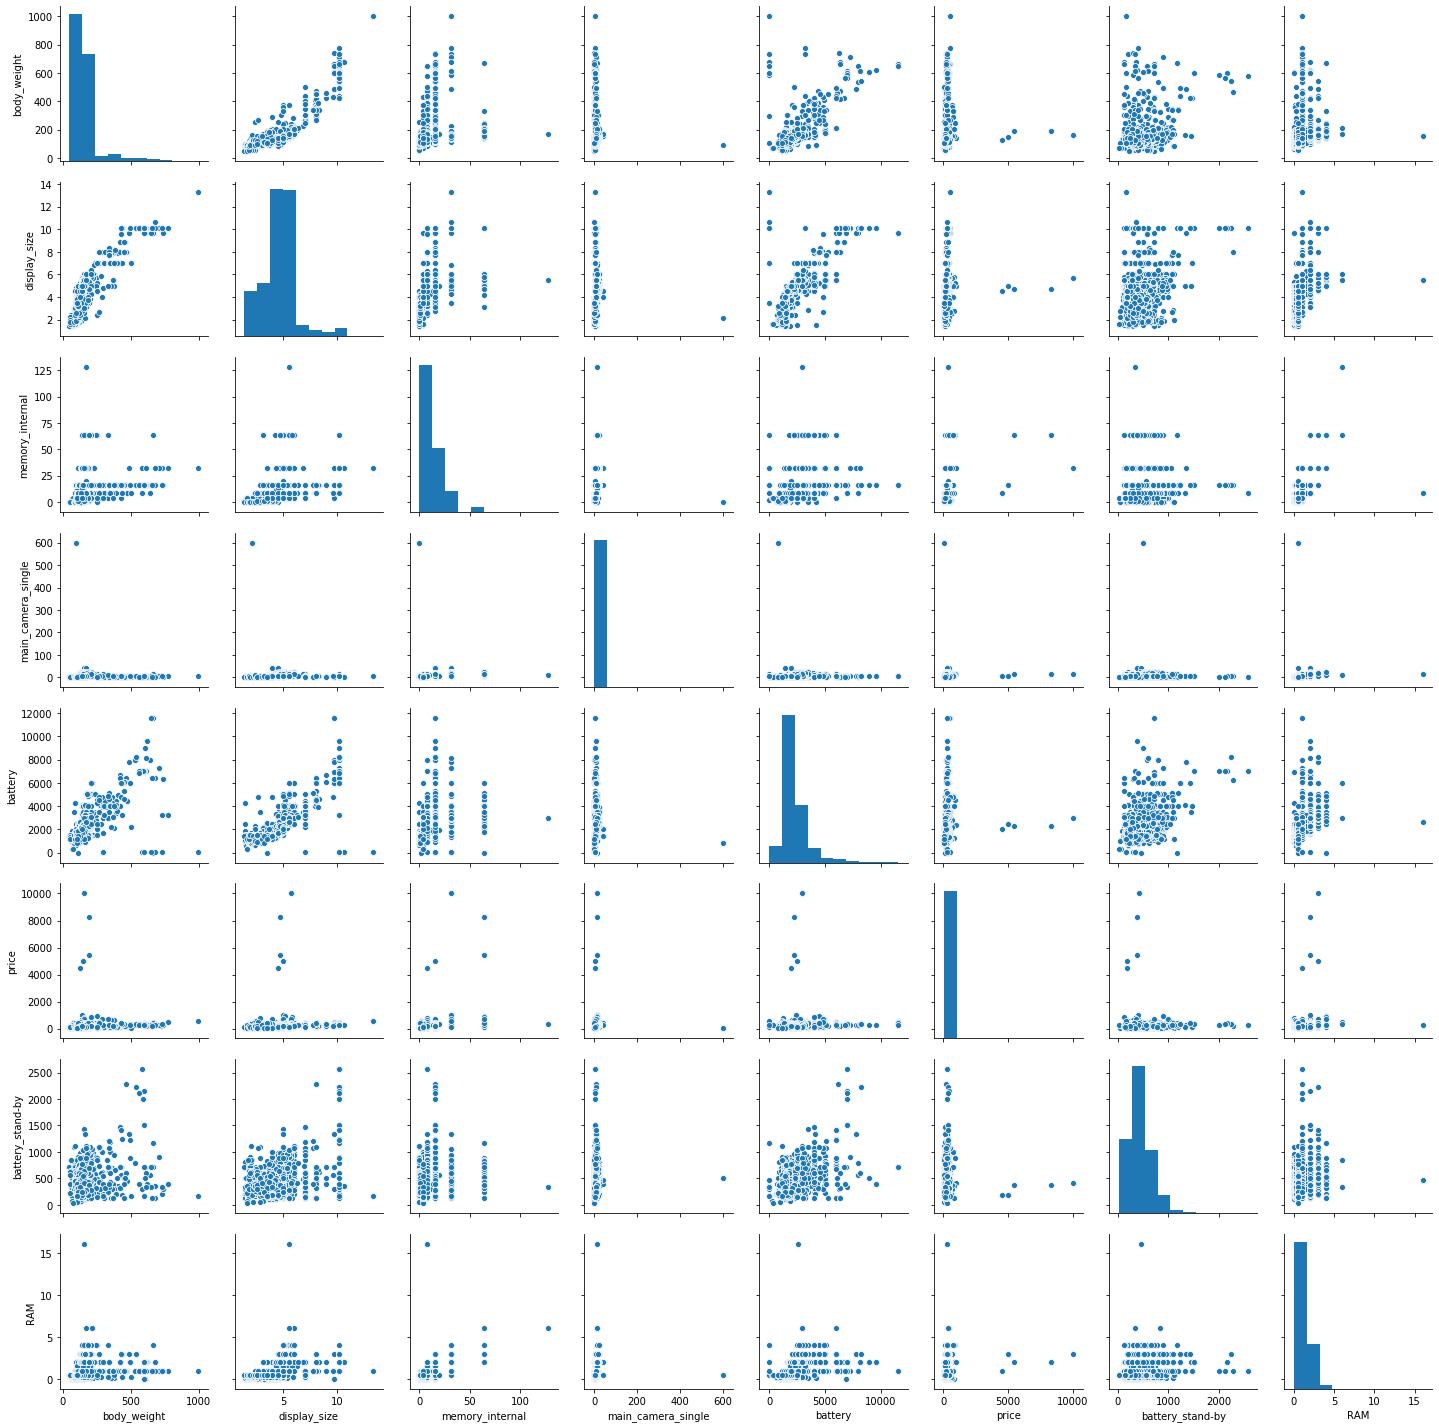

In [1411]:
plt.figure(figsize=(20, 10))
sns.pairplot(data2)
plt.show()

#### Exploring values of "price" column

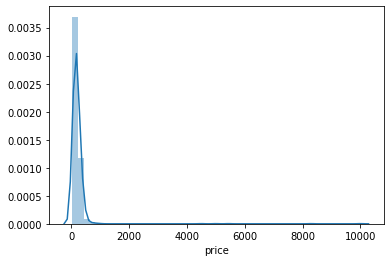

In [1412]:
sns.distplot(data2['price'])
plt.show()

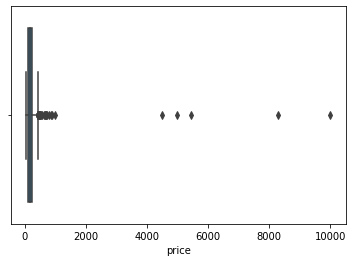

In [1413]:
import seaborn as sns
sns.boxplot(x=data2['price'])
#outliers are detected

In [1414]:
Q1 = data2['price'].quantile(0.25)
Q3 = data2['price'].quantile(0.75)
IQR = Q3 - Q1

outliers = data2[(data2['price'] <= Q1 - 1.5 * IQR) | (data2['price'] >= Q3 + 1.5 *IQR)]['price']

In [1415]:
outliers

70        490.0
188       460.0
491       450.0
493       420.0
528       490.0
543       470.0
675       470.0
676       500.0
687       420.0
696       500.0
863       510.0
874       730.0
885      1000.0
890       450.0
1061      430.0
1075      800.0
1445      450.0
1447      900.0
1450      440.0
1453      460.0
1777      450.0
1911      460.0
1930      420.0
1936      480.0
2162      480.0
2199      420.0
2351      640.0
2362      660.0
2649      550.0
2888      444.0
3140      430.0
3142      430.0
3165      480.0
3170      420.0
3917     5000.0
3918     4500.0
3921    10000.0
4301      420.0
5067      440.0
5084      420.0
6194      850.0
6339      450.0
6370      440.0
6384      480.0
6418      680.0
6425      420.0
6452      440.0
7319      470.0
7419      700.0
7420      700.0
7421      490.0
7891      420.0
7974      540.0
8030     5440.0
8031     8290.0
Name: price, dtype: float64

In [1416]:
#getting rid of outliers
filter = (data2['price'] >= Q1 - 1.5 * IQR) & (data2['price'] <= Q3 + 1.5 *IQR)
data2 = data2.loc[filter] 

In [1417]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1446 entries, 5 to 8115
Data columns (total 8 columns):
body_weight           1446 non-null float64
display_size          1446 non-null float64
memory_internal       1446 non-null float64
main_camera_single    1446 non-null float64
battery               1446 non-null float64
price                 1446 non-null float64
battery_stand-by      1446 non-null float64
RAM                   1446 non-null float64
dtypes: float64(8)
memory usage: 101.7 KB


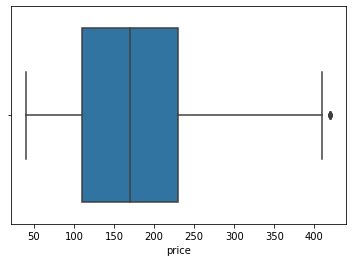

In [1418]:
import seaborn as sns
sns.boxplot(x=data2['price'])

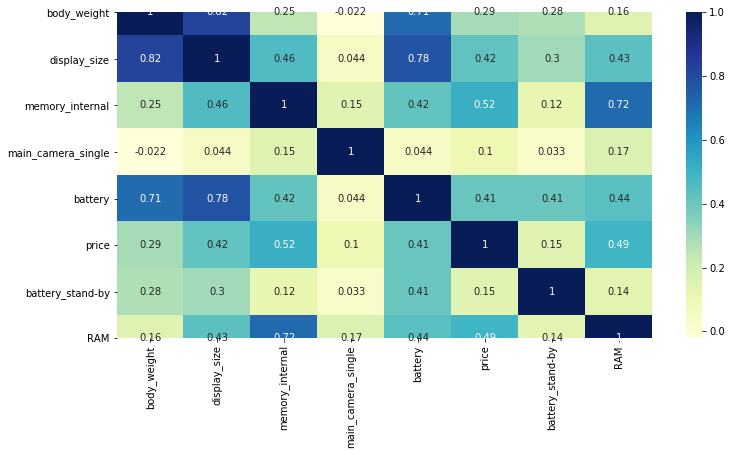

In [1419]:
cor = data2.corr()
plt.figure(figsize=(12,6))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

# Data Preparation

In [1420]:
# concat dummy variables with data2
data2 = pd.concat([data2, sim2], axis=1)

In [1421]:
data2 = pd.concat([data2, plat_os2], axis=1)

In [1422]:
data2 = data2.dropna()

In [1423]:
data2.shape

(1446, 23)

In [1424]:
data2.columns

Index(['body_weight', 'display_size', 'memory_internal', 'main_camera_single',
       'battery', 'price', 'battery_stand-by', 'RAM', 'Micro', 'Mini', 'Nano',
       'Android', 'Microsoft', 'Symbian', 'Other', 'BlackBerry', 'iOS',
       'Linux', 'watchOS', 'Firefox', 'Android-based', 'Tizen-based', 'Palm'],
      dtype='object')

In [1425]:
X = data2[['body_weight', 'display_size', 'memory_internal', 'main_camera_single',
       'battery', 'battery_stand-by', 'RAM', 'Micro', 'Mini', 'Nano',
       'Android', 'Microsoft', 'Symbian', 'Other', 'BlackBerry', 'iOS',
       'Linux', 'watchOS', 'Firefox', 'Android-based', 'Tizen-based', 'Palm']].values

In [1426]:
y = data2['price'].values

In [1427]:
# Scaling the features
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [1428]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [1429]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1156, 22) (1156,)
Test set: (290, 22) (290,)


# Building model

### 1. Linear Regression

First Linear Regression model will be used to provide baseline level of accuracy.

In [1430]:
lm = LinearRegression()

In [1431]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1432]:
#coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[-2.27443170e+00  1.53536662e+01  2.19460528e+01  7.68387714e-01
  6.60397932e+00 -5.85596061e-01  1.59689477e+01  1.76217803e+01
  1.55381801e+01  1.08597701e+01  2.17825992e+00 -1.58166070e+00
  3.15346280e-02  6.59839645e-01 -5.22285772e+00  8.97531035e+00
 -3.29877232e+00  4.44089210e-16  4.44089210e-16 -1.24823183e+00
  5.80017649e+00  5.57543159e-01]
179.97392894247218


In [1433]:
y_pred = lm.predict(X_test)

In [1434]:
y_pred[0:6]

array([160.4782694 , 222.54195342,  97.1842182 , 147.17564404,
        98.33033366, 164.01674664])

In [1435]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2[0:7]

,Actual,Predicted
0,270.0,160.478269
1,370.0,222.541953
2,120.0,97.184218
3,180.0,147.175644
4,70.0,98.330334
5,110.0,164.016747
6,100.0,153.076764


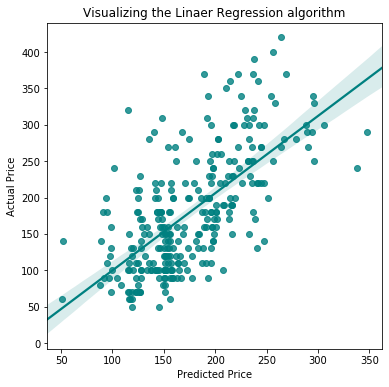

In [1436]:
plt.figure(figsize= (6, 6))
plt.title("Visualizing the Linaer Regression algorithm")
sns.regplot(y_pred, y_test, color = "teal")
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.show()

In [1437]:
print("Mean Absolute Error:", round(mean_absolute_error(y_test, y_pred),3))
print("Mean Squared Error:", round(mean_squared_error(y_test, y_pred),3))
print("The R2 Square Value: ", round(r2_score(y_test, y_pred)*100,3))

Mean Absolute Error: 48.129
Mean Squared Error: 3671.64
The R2 Square Value:  43.393


### 2. XGBoost

In [1438]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)

[09:16:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [1439]:
training_pred = xgb_reg.predict(X_train)
y_pred_xgb = xgb_reg.predict(X_test)

In [1440]:
#changing X_train array to dataframe for finding weights
dt_X_train = pd.DataFrame(data=X_train) 

In [1441]:
dt_X_train.columns = ['body_weight', 'display_size', 'memory_internal', 'main_camera_single',
       'battery', 'battery_stand-by', 'RAM', 'Micro_sim', 'Mini_sim', 'Nano_sim',
       'Android_os', 'Microsoft_os', 'Symbian_os', 'Other_os', 'BlackBerry_os', 'iOS_os',
       'Linux_os', 'watchOS_os', 'Firefox_os', 'Android-based_os', 'Tizen-based_os', 'Palm_os']

In [1442]:
dt_X_train.head()

,body_weight,display_size,memory_internal,main_camera_single,battery,battery_stand-by,RAM,Micro_sim,Mini_sim,Nano_sim,...,Symbian_os,Other_os,BlackBerry_os,iOS_os,Linux_os,watchOS_os,Firefox_os,Android-based_os,Tizen-based_os,Palm_os
0,-0.558775,0.300528,-0.241241,0.314355,-0.113572,-0.481357,-0.115048,-0.478066,-0.692850,-0.256097,...,-0.155175,-0.098876,-0.118428,-0.095246,-0.045596,0.0,0.0,-0.045596,-0.037216,-0.037216
1,0.027990,0.431139,0.476512,0.789636,0.796465,0.964872,1.999862,2.091761,-0.692850,-0.256097,...,-0.155175,-0.098876,-0.118428,-0.095246,-0.045596,0.0,0.0,-0.045596,-0.037216,-0.037216
2,-0.182360,0.431139,1.912018,0.789636,0.573093,0.522969,1.999862,-0.478066,-0.692850,3.904765,...,-0.155175,-0.098876,-0.118428,-0.095246,-0.045596,0.0,0.0,-0.045596,-0.037216,-0.037216
3,-0.193431,0.104611,-0.600118,0.252630,-0.196302,-1.244644,-0.115048,-0.478066,-0.692850,-0.256097,...,-0.155175,-0.098876,-0.118428,-0.095246,-0.045596,0.0,0.0,-0.045596,-0.037216,-0.037216
4,-0.746983,-0.874973,-0.779556,-0.179444,-0.932605,0.201585,-0.643775,-0.478066,1.443314,-0.256097,...,6.444332,-0.098876,-0.118428,-0.095246,-0.045596,0.0,0.0,-0.045596,-0.037216,-0.037216


In [1443]:
pd.DataFrame(data=[dt_X_train.columns, lm.coef_])

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,body_weight,display_size,memory_internal,main_camera_single,battery,battery_stand-by,RAM,Micro_sim,Mini_sim,Nano_sim,...,Symbian_os,Other_os,BlackBerry_os,iOS_os,Linux_os,watchOS_os,Firefox_os,Android-based_os,Tizen-based_os,Palm_os
1,-2.27443,15.3537,21.9461,0.768388,6.60398,-0.585596,15.9689,17.6218,15.5382,10.8598,...,0.0315346,0.65984,-5.22286,8.97531,-3.29877,4.44089e-16,4.44089e-16,-1.24823,5.80018,0.557543


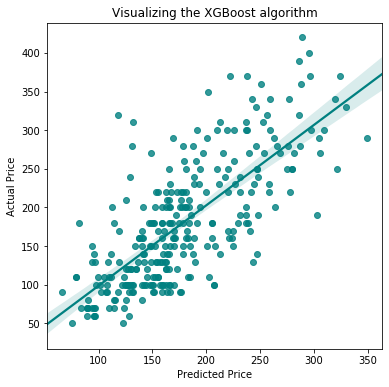

In [1444]:
plt.figure(figsize= (6, 6))
plt.title("Visualizing the XGBoost algorithm")
sns.regplot(y_pred_xgb, y_test, color = "teal")
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.show()

In [1445]:
print("Mean Absolute Error:", round(mean_absolute_error(y_test, y_pred_xgb),3))
print("Mean Squared Error:", round(mean_squared_error(y_test, y_pred_xgb),3))
print("The R2 Square Value: ", round(r2_score(y_test, y_pred_xgb)*100,3))

Mean Absolute Error: 42.644
Mean Squared Error: 2919.478
The R2 Square Value:  54.989


### 3.Lasso Regression

In [1446]:
reg = linear_model.Lasso(alpha=0.1)

In [1447]:
reg.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1448]:
y_pred_lasso = reg.predict(X_test)

In [1449]:
y_pred_lasso[0:5]

array([159.98807478, 221.54500616,  98.17986151, 148.86057881,
        99.35314258])

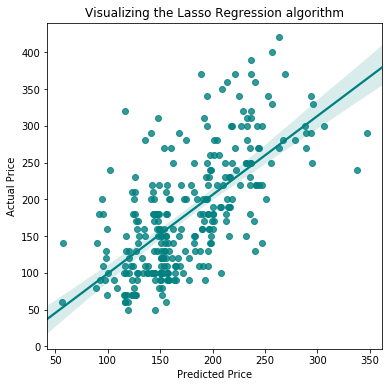

In [1450]:
plt.figure(figsize= (6, 6))
plt.title("Visualizing the Lasso Regression algorithm")
sns.regplot(y_pred_lasso, y_test, color = "teal")
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.show()

In [1451]:
print("Mean Absolute Error:", round(mean_absolute_error(y_test, y_pred_lasso),3))
print("Mean Squared Error:", round(mean_squared_error(y_test, y_pred_lasso),3))
print("The R2 Square Value: ", round(r2_score(y_test, y_pred_lasso)*100,3))

Mean Absolute Error: 48.097
Mean Squared Error: 3665.716
The R2 Square Value:  43.484


### 4. Random Forest

In [1452]:
rand = RandomForestRegressor()
rand.fit(X_train, y_train)

c:\users\lusine\anaconda2\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [1453]:
y_pred_rf = rand.predict(X_test)

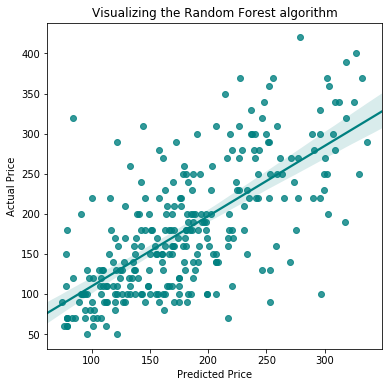

In [1454]:
plt.figure(figsize= (6, 6))
plt.title("Visualizing the Random Forest algorithm")
sns.regplot(y_pred_rf, y_test, color = "teal")
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.show()

In [1455]:
print("Mean Absolute Error:", round(mean_absolute_error(y_test, y_pred_rf),3))
print("Mean Squared Error:", round(mean_squared_error(y_test, y_pred_rf),3))
print("The R2 Square Value: ", round(r2_score(y_test, y_pred_rf)*100,3))

Mean Absolute Error: 44.1
Mean Squared Error: 3431.032
The R2 Square Value:  47.102


# Conclusion

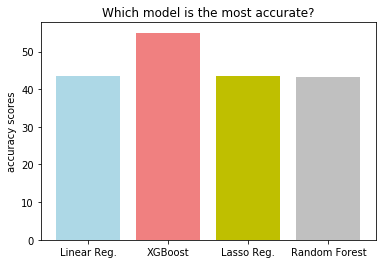

In [1456]:
models = ['Linear Reg.', 'XGBoost', 'Lasso Reg.', 'Random Forest']
acc_scores = [43.393, 54.989, 43.484, 43.352]

plt.bar(models, acc_scores, color=['lightblue', 'lightcoral', 'y', 'silver'])
plt.ylabel("accuracy scores")
plt.title("Which model is the most accurate?")
plt.show()

XGBoost model (Model 2) is the preferred model, since it has the highest accuracy. Howerver this model only explained 55% variation in price. A significant proportion of this unexplained variance is due to missing values.

In [1457]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=dt_X_train.columns)
ft_weights_xgb_reg.sort_values('weight', ascending=False, inplace=True)
ft_weights_xgb_reg

,weight
memory_internal,0.338662
main_camera_single,0.120622
RAM,0.067212
Micro_sim,0.066416
iOS_os,0.061803
Nano_sim,0.049021
display_size,0.046885
battery,0.042784
Mini_sim,0.035510
BlackBerry_os,0.030608


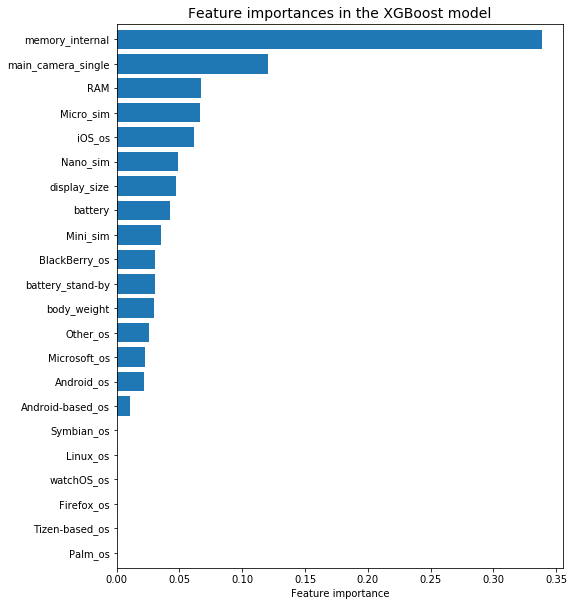

In [1458]:
# Plotting feature importances
plt.figure(figsize=(8,10))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight,  align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.gca().invert_yaxis()
plt.show()

According to XGBoost model the most important features are internal memory and quality of main camera. Other important features include RAM size, opportunity to use micro sim card and iOS os. Some features don't affect price at all (several operating systems like Symbian, Linux, watchOS, Firefox, etc).